# How brain images are organized

We will use the nilearn library to read open data from the web on our computer.

In [1]:
from nilearn import datasets

Nilearn contains functions which copy files containing brain images to our local computer.

In [2]:
haxby_dataset = datasets.fetch_haxby()

The variable <code>haxby_dataset</code> stores the path to the brain image files that we just downloaded.

In [3]:
haxby_dataset.anat

['/Users/beau/nilearn_data/haxby2001/subj2/anat.nii.gz']

Brain images can be stored in many different types of files, including the Neuroimaging Informatics Technology Initiative (NIfTI) format, the Digital Imaging and Communications in Medicine standard (DICOM), and many others. We will be using NIfTI files to store brain images. 

The file name provides information about the type of data stored in it and the file format. We can tell from the file name above that it contains an anatomical image ("anat"), that it is a NIfTI file (because of the ".nii" extension) and that it is compressed using gzip (the ".gz" extension.)

Next we need to read the file into a variable in our Python environment. Nilearn provides tools for reading and writing NIfTI files in <code>nilearn.image</code>. Now we will use <code>nilearn.image.load_img()</code> to read the dataset we downloaded into a variable in our Python environment.

In [4]:
from nilearn import image

haxby_anat = image.load_img(haxby_dataset.anat)

Now the variable <code>haxby_anat</code> contains the brain image data stored in the NIfTI file we downloaded, as well as lots of information about the brain image, or _metadata._

In [5]:
haxby_anat_data = haxby_anat.get_data()

One important property of a brain image is its _shape,_ or the number of data points in the x, y, z, and time dimensions.

In [6]:
haxby_anat_data.shape

(124, 256, 256, 1)

We see the shape of the data has 4 values, each corresponding to a dimension. By convention, the first three dimensions are x, y, and z, and the fourth dimension is time.

Nilearn uses NumPy, a Python library for scientific computing, to store the image data.

In [7]:
type(haxby_anat_data)

numpy.ndarray

## Plotting brain images

We can use NumPy's array indexing syntax to take a closer look at the data. Let's select all of the values along the y and z-axes, while holding the x and time axes fixed.

In [8]:
haxby_anat_data[65, :, :, 0]

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int16)

The result is a NumPy array containing values that correspond to the intensity value at each (y, z) location. It's hard to tell what's going on just by reading the numbers, so let's use Matplotlib to plot the result.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

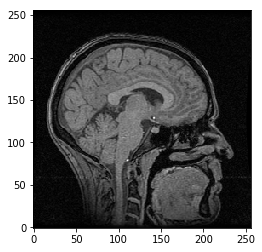

In [10]:
# Note that we must transpose the data and set the origin argument to 'lower'
# which sets the origin of the plot to the lower-left corner.
plt.imshow(haxby_anat_data[65, :, :, 0].T, cmap='gray', interpolation='none', origin="lower");

Now we can clearly see that selecting all y and z-axis values while holding the x-axis value constant gives us a saggital slice of the brain image. If we change the x-axis value that we hold constant, we will plot a different saggital slice:

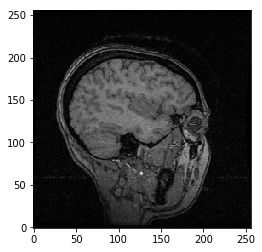

In [62]:
plt.imshow(haxby_anat_data[30, :, :, 0].T, cmap='gray', interpolation='none', origin="lower");

Holding the y axis constant provides a coronal slice:

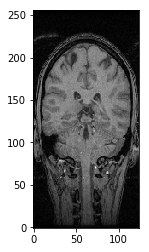

In [63]:
plt.imshow(haxby_anat_data[:, 100, :, 0].T, cmap='gray', interpolation='none', origin="lower");

And holding the z-axis constant provides an axial slice:

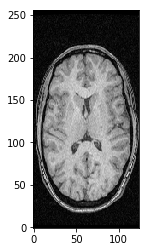

In [64]:
plt.imshow(haxby_anat_data[:, :, 150, 0].T, cmap='gray', interpolation='none', origin="lower");

Nilearn provides a collection of functions that simplify plotting neuroimaging data. Let's use these functions to simultaneously plot coronal, saggital, and axial slices of our anatomical image.

In [14]:
from nilearn import plotting

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


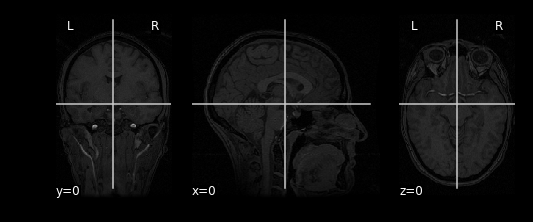

In [19]:
plotting.plot_anat(haxby_anat, cut_coords=(0,0,0));

This contrast (the difference between the darkest and lightest parts of the image) is a little low. Let's find the value of the brightest part of the image, and use a value _lower_ than the brightest value as the maximum for our plot, increasing the contrast.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


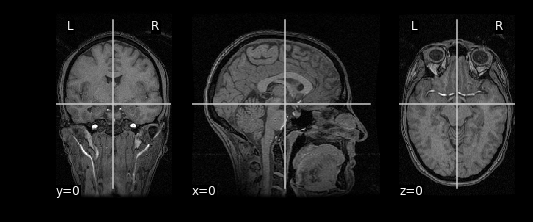

In [21]:
haxby_max = haxby_anat_data.max()
plotting.plot_anat(haxby_anat, vmax=haxby_max/2, cut_coords=(0,0,0));

This plot looks a lot better. All three views are presented, the left/right orientation of the image is displayed, and crosshairs are used to identify the displayed (x,y,z) coordinate.

## Scanner-subject reference coordinate space vs. voxel space

Looking at the plot above, the crosshair is centered on (x,y,z) coordinate (0,0,0). However, for the NumPy array holding our image data (0,0,0) corresponds to the first voxel stored along each axis (e.g., the lower-left corner). What's going on here?

Nilearn plotting functions take a <code>cut_coords</code> argument that expects an (x,y,z) coordinate in _scanner-subject reference space._ Scanner-subject reference coordinates are centered around the magnet isocenter and are specified in millimeters, whereas NumPy uses a _voxel space_ specified in voxels.

Now we will plot our anatomical image with the crosshairs centered on a point 4cm forward (along the y-axis) and 4cm up (along the z-axis):

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


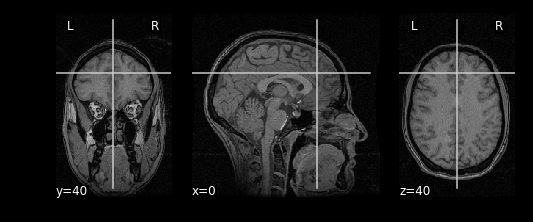

In [28]:
plotting.plot_anat(haxby_anat, vmax=haxby_max/2, cut_coords=(0,40,40));

Internally, nilearn uses metadata stored in the NIfTI file to transform scanner-subject reference coordinates into voxel space coordinates and vice-versa. This transformation is called an <a href="https://en.wikipedia.org/wiki/Affine_transformation">affine transformation</a>. We won't go into the details about how affine transformations work here, but we will show you how they are applied to allow us to work with different coordinate spaces at the same time. Although this happens "under the hood," it will be important to remember in later modules about motion correction and normalization to standard anatomical templates.

Nilearn makes the affine transformation matrix available to us using the <code>.affine</code> property.

In [38]:
haxby_anat.affine

array([[  -1.20000005,    0.        ,    0.        ,   73.80000293],
       [   0.        ,    0.9375    ,    0.        , -119.53125   ],
       [   0.        ,    0.        ,    0.9375    , -119.53125   ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

And for any set of voxel coordinates, we find the corresponding scanner-subject reference space coordinates using linear algebra:

In [59]:
voxel_ikj = [0,0,0]  # The first voxel stored in our data array
subject_xyz = haxby_anat.affine.dot(voxel_ikj + [1])  # Add a [1] for mathematical convenience
print(subject_xyz)

[  73.80000293 -119.53125    -119.53125       1.        ]


For any set of subject-reference coordinates, we can use the inverse of the affine matrix to calculate the corresponding set of voxel coordinates:

In [60]:
import numpy.linalg as npl

subject_xyz = [0,0,0]  # The magnet isocenter
voxel_ikj = npl.inv(haxby_anat.affine).dot(subject_xyz + [1])
print(voxel_ikj)

[  61.5  127.5  127.5    1. ]


Let's plot the anatomical image with the crosshairs centered on the (0,0,0) voxel space coordinate, at a far corner of the image. Because this is one of the furthest points from the magnet isocenter, we should see very little brain:

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


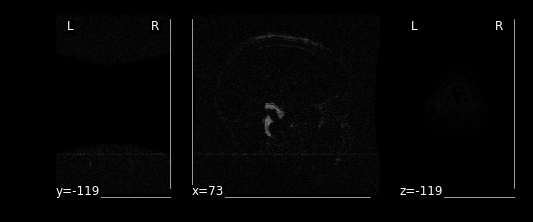

In [61]:
voxel_ikj = [0,0,0]  # The first voxel stored in our data array
subject_xyz = haxby_anat.affine.dot(voxel_ikj + [1])
subject_xyz = subject_xyz[:3]  # Remove the [1] added for mathematical convenience

plotting.plot_anat(haxby_anat, vmax=haxby_max/2, cut_coords=subject_xyz);

## Conclusion

write a conclusion

## Additional references

Information about the process of translating between scanner-subject reference coordinates and NumPy array indexes: http://nipy.org/nibabel/coordinate_systems.html

Detailed information about the NIfTI file format: https://brainder.org/2012/09/23/the-nifti-file-format/